### Importing required modules

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

### Reading the files

In [2]:
df_train = pd.read_csv(r"C:\Users\sujee\Downloads\Dataset.txt", sep="\t")
df_train.head()

,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F14,F15,F16,F17,F18,F19,F20,F21,F22,C
0,1,0.224506,0.500340,0.489860,0.902413,7934,-6970,-5714,9982,-5697,...,-3433637453,10/4/1986,9/6/1992,2,1,706,305,1,2,0
1,2,0.321128,0.281119,0.907283,0.772159,-8238,1219,1663,1287,-3658,...,609277486,2/24/1979,1/5/1983,1,1,423,206,18,7,1
2,3,0.893441,0.622005,0.998776,0.098386,8540,5266,-9377,-3504,-4511,...,-8977995005,1/12/1989,11/22/1986,2,1,703,315,1,4,0
3,4,0.320641,0.957234,0.346000,0.646479,-7772,-383,9681,-8661,3474,...,4868760308,2/18/1982,6/10/1992,1,1,122,304,15,1,0
4,5,0.475961,0.623008,0.544988,0.159709,1571,-8039,-7961,-2385,4407,...,9757408267,4/10/1987,10/19/1985,1,1,486,240,1,1,0


In [3]:
df_test = pd.read_csv(r"C:\Users\sujee\Downloads\Dataset_test.txt", sep="\t")
df_test.sample(5)

,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22
1462,T30235803,0.563052,0.877624,0.903993,0.304393,-7140,-7916,-745,392,-9974,...,6783728939,-3577048586,1/2/1990,5/1/1989,1,1,581,110,3,6
14062,T30248403,0.724169,0.122644,0.113243,0.927576,-2528,3309,8532,-8596,4461,...,-2667267517,4770765006,11/15/1981,5/13/1994,1,1,328,481,7,6
15808,T30250149,0.586742,0.744139,0.612701,0.573289,-1927,-7366,9932,8259,-5735,...,-4012657186,2322758077,1/21/1991,4/5/1991,1,1,562,48,1,5
6008,T30240349,0.741213,0.239700,0.144746,0.791404,-1475,-9691,1681,-9277,7592,...,3666466091,-6044688906,8/9/1988,11/18/1992,3,1,757,585,6,1
17203,T30251544,0.610919,0.553150,0.462301,0.353929,6887,2160,-1094,2317,7000,...,-9195343120,-5108145289,2/28/1990,9/22/1990,1,1,484,58,10,1


### Data preprocessing

### Checking basic data stats.

In [4]:
#Training data

In [5]:
df_train.columns

Index(['Index', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10',
       'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20',
       'F21', 'F22', 'C'],
      dtype='object')

In [6]:
df_train.shape

(101180, 24)

In [7]:
df_train.dtypes

Index      int64
F1       float64
F2       float64
F3       float64
F4       float64
F5         int64
F6         int64
F7         int64
F8         int64
F9         int64
F10        int64
F11        int64
F12        int64
F13        int64
F14        int64
F15       object
F16       object
F17        int64
F18        int64
F19        int64
F20        int64
F21        int64
F22        int64
C          int64
dtype: object

In [8]:
df_train.isnull().sum()

Index    0
F1       0
F2       0
F3       0
F4       0
F5       0
F6       0
F7       0
F8       0
F9       0
F10      0
F11      0
F12      0
F13      0
F14      0
F15      0
F16      0
F17      0
F18      0
F19      0
F20      0
F21      0
F22      0
C        0
dtype: int64

In [9]:
df_train.describe()

,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F12,F13,F14,F17,F18,F19,F20,F21,F22,C
count,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,...,1.011800e+05,1.011800e+05,1.011800e+05,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000
mean,50590.500000,0.502348,0.501497,0.499886,0.499839,-29.742617,1.511000,7.939118,16.434147,9.927812,...,6.921685e+06,1.127538e+07,-5.198163e+07,1.339593,1.335027,387.181479,387.333999,4.588031,4.598567,0.245375
std,29208.294456,0.288058,0.289017,0.288875,0.288729,5781.829379,5796.594007,5765.581875,5782.805211,5771.004738,...,5.771750e+09,5.786659e+09,5.782358e+09,0.894065,0.882435,235.939585,235.374285,4.775671,4.776494,0.430311
min,1.000000,0.000018,0.000004,0.000002,0.000006,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,...,-9.999754e+09,-9.999852e+09,-9.999767e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,25295.750000,0.253819,0.251115,0.248818,0.250501,-5045.000000,-5012.000000,-4979.000000,-4988.000000,-4992.250000,...,-4.991278e+09,-5.027003e+09,-5.070403e+09,1.000000,1.000000,187.000000,187.000000,1.000000,1.000000,0.000000
50%,50590.500000,0.501802,0.501095,0.499820,0.501387,-46.000000,-11.500000,16.500000,60.000000,22.500000,...,4.277384e+07,9.416236e+06,-8.816174e+07,1.000000,1.000000,374.000000,375.000000,3.000000,3.000000,0.000000
75%,75885.250000,0.753598,0.752404,0.750281,0.748803,4978.000000,5050.000000,4962.000000,5021.000000,5020.000000,...,5.008238e+09,5.032947e+09,4.947133e+09,1.000000,1.000000,560.000000,561.000000,7.000000,7.000000,0.000000
max,101180.000000,0.999986,0.999990,0.999985,0.999977,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,9.999555e+09,9.999951e+09,9.999997e+09,6.000000,6.000000,901.000000,901.000000,21.000000,21.000000,1.000000


In [10]:
#Testing data

In [11]:
df_test.columns

Index(['Index', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10',
       'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20',
       'F21', 'F22'],
      dtype='object')

In [12]:
df_test.shape

(19913, 23)

In [13]:
df_test.dtypes

Index     object
F1       float64
F2       float64
F3       float64
F4       float64
F5         int64
F6         int64
F7         int64
F8         int64
F9         int64
F10        int64
F11        int64
F12        int64
F13        int64
F14        int64
F15       object
F16       object
F17        int64
F18        int64
F19        int64
F20        int64
F21        int64
F22        int64
dtype: object

In [14]:
df_test.isnull().sum()

Index    0
F1       0
F2       0
F3       0
F4       0
F5       0
F6       0
F7       0
F8       0
F9       0
F10      0
F11      0
F12      0
F13      0
F14      0
F15      0
F16      0
F17      0
F18      0
F19      0
F20      0
F21      0
F22      0
dtype: int64

In [15]:
df_test.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F17,F18,F19,F20,F21,F22
count,19913.000000,19913.000000,19913.000000,19913.000000,19913.000000,19913.000000,19913.000000,19913.000000,19913.000000,1.991300e+04,1.991300e+04,1.991300e+04,1.991300e+04,1.991300e+04,19913.000000,19913.000000,19913.000000,19913.000000,19913.000000,19913.000000
mean,0.499991,0.500893,0.499128,0.499067,15.011952,-71.673932,2.344348,11.675689,60.423693,-2.642097e+07,2.394661e+07,-4.686495e+07,-1.033644e+07,1.763265e+06,1.346357,1.335560,389.010546,385.610656,4.636318,4.569176
std,0.287076,0.288236,0.289164,0.288076,5779.233483,5750.863787,5769.979667,5788.046016,5769.787325,5.781201e+09,5.767821e+09,5.773837e+09,5.757751e+09,5.725641e+09,0.910139,0.883018,236.127249,236.015853,4.780435,4.740329
min,0.000041,0.000013,0.000153,0.000044,-10000.000000,-10000.000000,-9999.000000,-10000.000000,-10000.000000,-9.999558e+09,-9.998929e+09,-9.999531e+09,-9.997783e+09,-9.999499e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.251199,0.251930,0.247825,0.249564,-5006.000000,-5041.000000,-4941.000000,-4967.000000,-4929.000000,-5.074430e+09,-4.943452e+09,-5.035224e+09,-5.026790e+09,-4.951253e+09,1.000000,1.000000,192.000000,186.000000,1.000000,1.000000
50%,0.499419,0.499680,0.497751,0.498086,32.000000,-5.000000,-39.000000,-7.000000,15.000000,-9.361856e+07,5.517004e+06,-1.123502e+08,7.096833e+07,-7.624511e+07,1.000000,1.000000,375.000000,370.000000,3.000000,3.000000
75%,0.749192,0.752245,0.750036,0.749481,5014.000000,4861.000000,5019.000000,5027.000000,5118.000000,4.980296e+09,5.013507e+09,4.952061e+09,4.923298e+09,4.989647e+09,1.000000,1.000000,561.000000,559.000000,7.000000,7.000000
max,0.999993,0.999992,0.999949,0.999845,10000.000000,9999.000000,10000.000000,9999.000000,10000.000000,9.998904e+09,9.999911e+09,9.999915e+09,9.999626e+09,9.999739e+09,6.000000,6.000000,901.000000,901.000000,21.000000,21.000000


### Encoding

In [16]:
#Training data

In [17]:
df_train.F15 = pd.to_datetime(df_train.F15)
df_train.F16 = pd.to_datetime(df_train.F16)
df_train.head()

,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F14,F15,F16,F17,F18,F19,F20,F21,F22,C
0,1,0.224506,0.500340,0.489860,0.902413,7934,-6970,-5714,9982,-5697,...,-3433637453,1986-10-04,1992-09-06,2,1,706,305,1,2,0
1,2,0.321128,0.281119,0.907283,0.772159,-8238,1219,1663,1287,-3658,...,609277486,1979-02-24,1983-01-05,1,1,423,206,18,7,1
2,3,0.893441,0.622005,0.998776,0.098386,8540,5266,-9377,-3504,-4511,...,-8977995005,1989-01-12,1986-11-22,2,1,703,315,1,4,0
3,4,0.320641,0.957234,0.346000,0.646479,-7772,-383,9681,-8661,3474,...,4868760308,1982-02-18,1992-06-10,1,1,122,304,15,1,0
4,5,0.475961,0.623008,0.544988,0.159709,1571,-8039,-7961,-2385,4407,...,9757408267,1987-04-10,1985-10-19,1,1,486,240,1,1,0


In [18]:
df_train["F15_Year"] = df_train.F15.dt.year
df_train["F15_Month"] = df_train.F15.dt.month
df_train["F15_Day"] = df_train.F15.dt.day
df_train["F15_Dayofweek"] = df_train.F15.dt.dayofweek  # Monday=0,..., Sunday=6

In [19]:
df_train["F16_Year"] = df_train.F16.dt.year
df_train["F16_Month"] = df_train.F16.dt.month
df_train["F16_Day"] = df_train.F16.dt.day
df_train["F16_Dayofweek"] = df_train.F16.dt.dayofweek 

In [20]:
df_train.drop(['F15', 'F16'], axis=1, inplace=True)
df_train.head()

,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F22,C,F15_Year,F15_Month,F15_Day,F15_Dayofweek,F16_Year,F16_Month,F16_Day,F16_Dayofweek
0,1,0.224506,0.500340,0.489860,0.902413,7934,-6970,-5714,9982,-5697,...,2,0,1986,10,4,5,1992,9,6,6
1,2,0.321128,0.281119,0.907283,0.772159,-8238,1219,1663,1287,-3658,...,7,1,1979,2,24,5,1983,1,5,2
2,3,0.893441,0.622005,0.998776,0.098386,8540,5266,-9377,-3504,-4511,...,4,0,1989,1,12,3,1986,11,22,5
3,4,0.320641,0.957234,0.346000,0.646479,-7772,-383,9681,-8661,3474,...,1,0,1982,2,18,3,1992,6,10,2
4,5,0.475961,0.623008,0.544988,0.159709,1571,-8039,-7961,-2385,4407,...,1,0,1987,4,10,4,1985,10,19,5


In [21]:
cols_seq = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 
            'F15_Day', 'F15_Month','F15_Year', 'F15_Dayofweek', 'F16_Day', 'F16_Month', 'F16_Year', 
            'F16_Dayofweek', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'C']

In [22]:
df_train = df_train[cols_seq]
df_train.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F16_Month,F16_Year,F16_Dayofweek,F17,F18,F19,F20,F21,F22,C
0,0.224506,0.500340,0.489860,0.902413,7934,-6970,-5714,9982,-5697,4227810299,...,9,1992,6,2,1,706,305,1,2,0
1,0.321128,0.281119,0.907283,0.772159,-8238,1219,1663,1287,-3658,-1146724819,...,1,1983,2,1,1,423,206,18,7,1
2,0.893441,0.622005,0.998776,0.098386,8540,5266,-9377,-3504,-4511,5947184989,...,11,1986,5,2,1,703,315,1,4,0
3,0.320641,0.957234,0.346000,0.646479,-7772,-383,9681,-8661,3474,-5724795826,...,6,1992,2,1,1,122,304,15,1,0
4,0.475961,0.623008,0.544988,0.159709,1571,-8039,-7961,-2385,4407,-3097637172,...,10,1985,5,1,1,486,240,1,1,0


In [23]:
#Testing data

In [24]:
df_test.F15 = pd.to_datetime(df_test.F15)
df_test.F16 = pd.to_datetime(df_test.F16)

In [25]:
df_test["F15_Year"] = df_test.F15.dt.year
df_test["F15_Month"] = df_test.F15.dt.month
df_test["F15_Day"] = df_test.F15.dt.day
df_test["F15_Dayofweek"] = df_test.F15.dt.dayofweek

In [26]:
df_test["F16_Year"] = df_test.F16.dt.year
df_test["F16_Month"] = df_test.F16.dt.month
df_test["F16_Day"] = df_test.F16.dt.day
df_test["F16_Dayofweek"] = df_test.F16.dt.dayofweek 

In [27]:
df_test.drop(['F15', 'F16'], axis=1, inplace=True)

In [28]:
cols_seq2 = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 
            'F15_Day', 'F15_Month','F15_Year', 'F15_Dayofweek', 'F16_Day', 'F16_Month', 'F16_Year', 
            'F16_Dayofweek', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22']

In [29]:
df_test = df_test[cols_seq2]
df_test.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F16_Day,F16_Month,F16_Year,F16_Dayofweek,F17,F18,F19,F20,F21,F22
0,0.654765,0.812009,0.603190,0.391039,-5220,4825,-1784,7447,-7147,-3461806391,...,18,8,1990,5,1,1,436,478,1,1
1,0.694636,0.690568,0.473460,0.259760,-618,-5018,2012,9259,9267,-36253473,...,11,4,1990,2,1,1,138,56,10,4
2,0.203759,0.323301,0.492294,0.011448,-8778,6141,6965,3774,4303,5354243488,...,4,5,1997,6,1,1,117,323,10,1
3,0.319627,0.286247,0.906197,0.093840,-7929,4471,7715,9543,335,7405036171,...,1,7,1988,4,1,1,115,149,16,21
4,0.236003,0.782784,0.285689,0.383585,-3296,4564,-1580,-8559,-27,-6351599280,...,3,12,1993,4,1,1,527,281,3,1


### Splitting the data

In [30]:
x = df_train.drop('C', axis=1)
y = df_train.C

In [31]:
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.2, random_state = 11)

### Feauture scaling

In [32]:
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)
df_test_sc = sc.transform(df_test)

### Dimensionality reduction

In [33]:
corr_mat = df_train.corr()
corr_mat

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F16_Month,F16_Year,F16_Dayofweek,F17,F18,F19,F20,F21,F22,C
F1,1.000000,0.004133,-0.000362,-0.000068,0.002246,-0.004772,-0.002282,0.004885,-0.003566,-0.000542,...,0.003395,-0.006495,0.001519,0.002261,-0.000322,0.005119,0.000737,0.003524,0.001905,-0.003222
F2,0.004133,1.000000,0.002162,-0.002540,0.000784,-0.001918,0.007180,0.001264,-0.001359,0.003328,...,-0.004585,-0.007184,0.005996,-0.003455,0.000010,-0.000049,-0.003102,0.000882,0.000089,-0.025360
F3,-0.000362,0.002162,1.000000,-0.001951,0.004431,0.003048,-0.002919,0.002998,-0.000022,0.000009,...,0.000483,-0.001590,-0.003118,0.000770,-0.003763,-0.001752,-0.001445,-0.000393,-0.001722,0.002111
F4,-0.000068,-0.002540,-0.001951,1.000000,-0.001021,0.002239,0.002765,-0.003080,0.000362,0.001897,...,0.001090,0.001141,0.004421,-0.006168,-0.004088,-0.002143,-0.002606,-0.002783,-0.002746,0.039255
F5,0.002246,0.000784,0.004431,-0.001021,1.000000,-0.001416,-0.001278,0.002407,0.001892,-0.001449,...,0.001436,-0.004847,-0.001823,0.001536,-0.006480,-0.000906,-0.003904,-0.006321,-0.000606,0.001055
F6,-0.004772,-0.001918,0.003048,0.002239,-0.001416,1.000000,0.001841,0.006144,0.002759,0.003075,...,0.000292,-0.000538,-0.004073,-0.001148,0.000021,0.001801,-0.001902,0.006707,-0.002640,0.002274
F7,-0.002282,0.007180,-0.002919,0.002765,-0.001278,0.001841,1.000000,0.003645,0.001188,-0.003711,...,-0.001006,-0.001851,-0.003829,-0.001467,-0.003077,-0.003939,-0.002556,0.001802,0.000369,0.000865
F8,0.004885,0.001264,0.002998,-0.003080,0.002407,0.006144,0.003645,1.000000,0.002951,-0.002059,...,0.002228,-0.000119,-0.006174,-0.000708,0.003779,-0.005989,0.004048,-0.001097,0.000933,-0.001022
F9,-0.003566,-0.001359,-0.000022,0.000362,0.001892,0.002759,0.001188,0.002951,1.000000,0.002106,...,0.000119,0.005189,-0.007635,-0.004533,-0.001911,-0.004429,-0.002459,0.002288,-0.001670,0.004590
F10,-0.000542,0.003328,0.000009,0.001897,-0.001449,0.003075,-0.003711,-0.002059,0.002106,1.000000,...,0.001889,0.008042,0.002250,-0.000384,-0.002590,0.001890,-0.003524,-0.001734,0.000549,0.008301


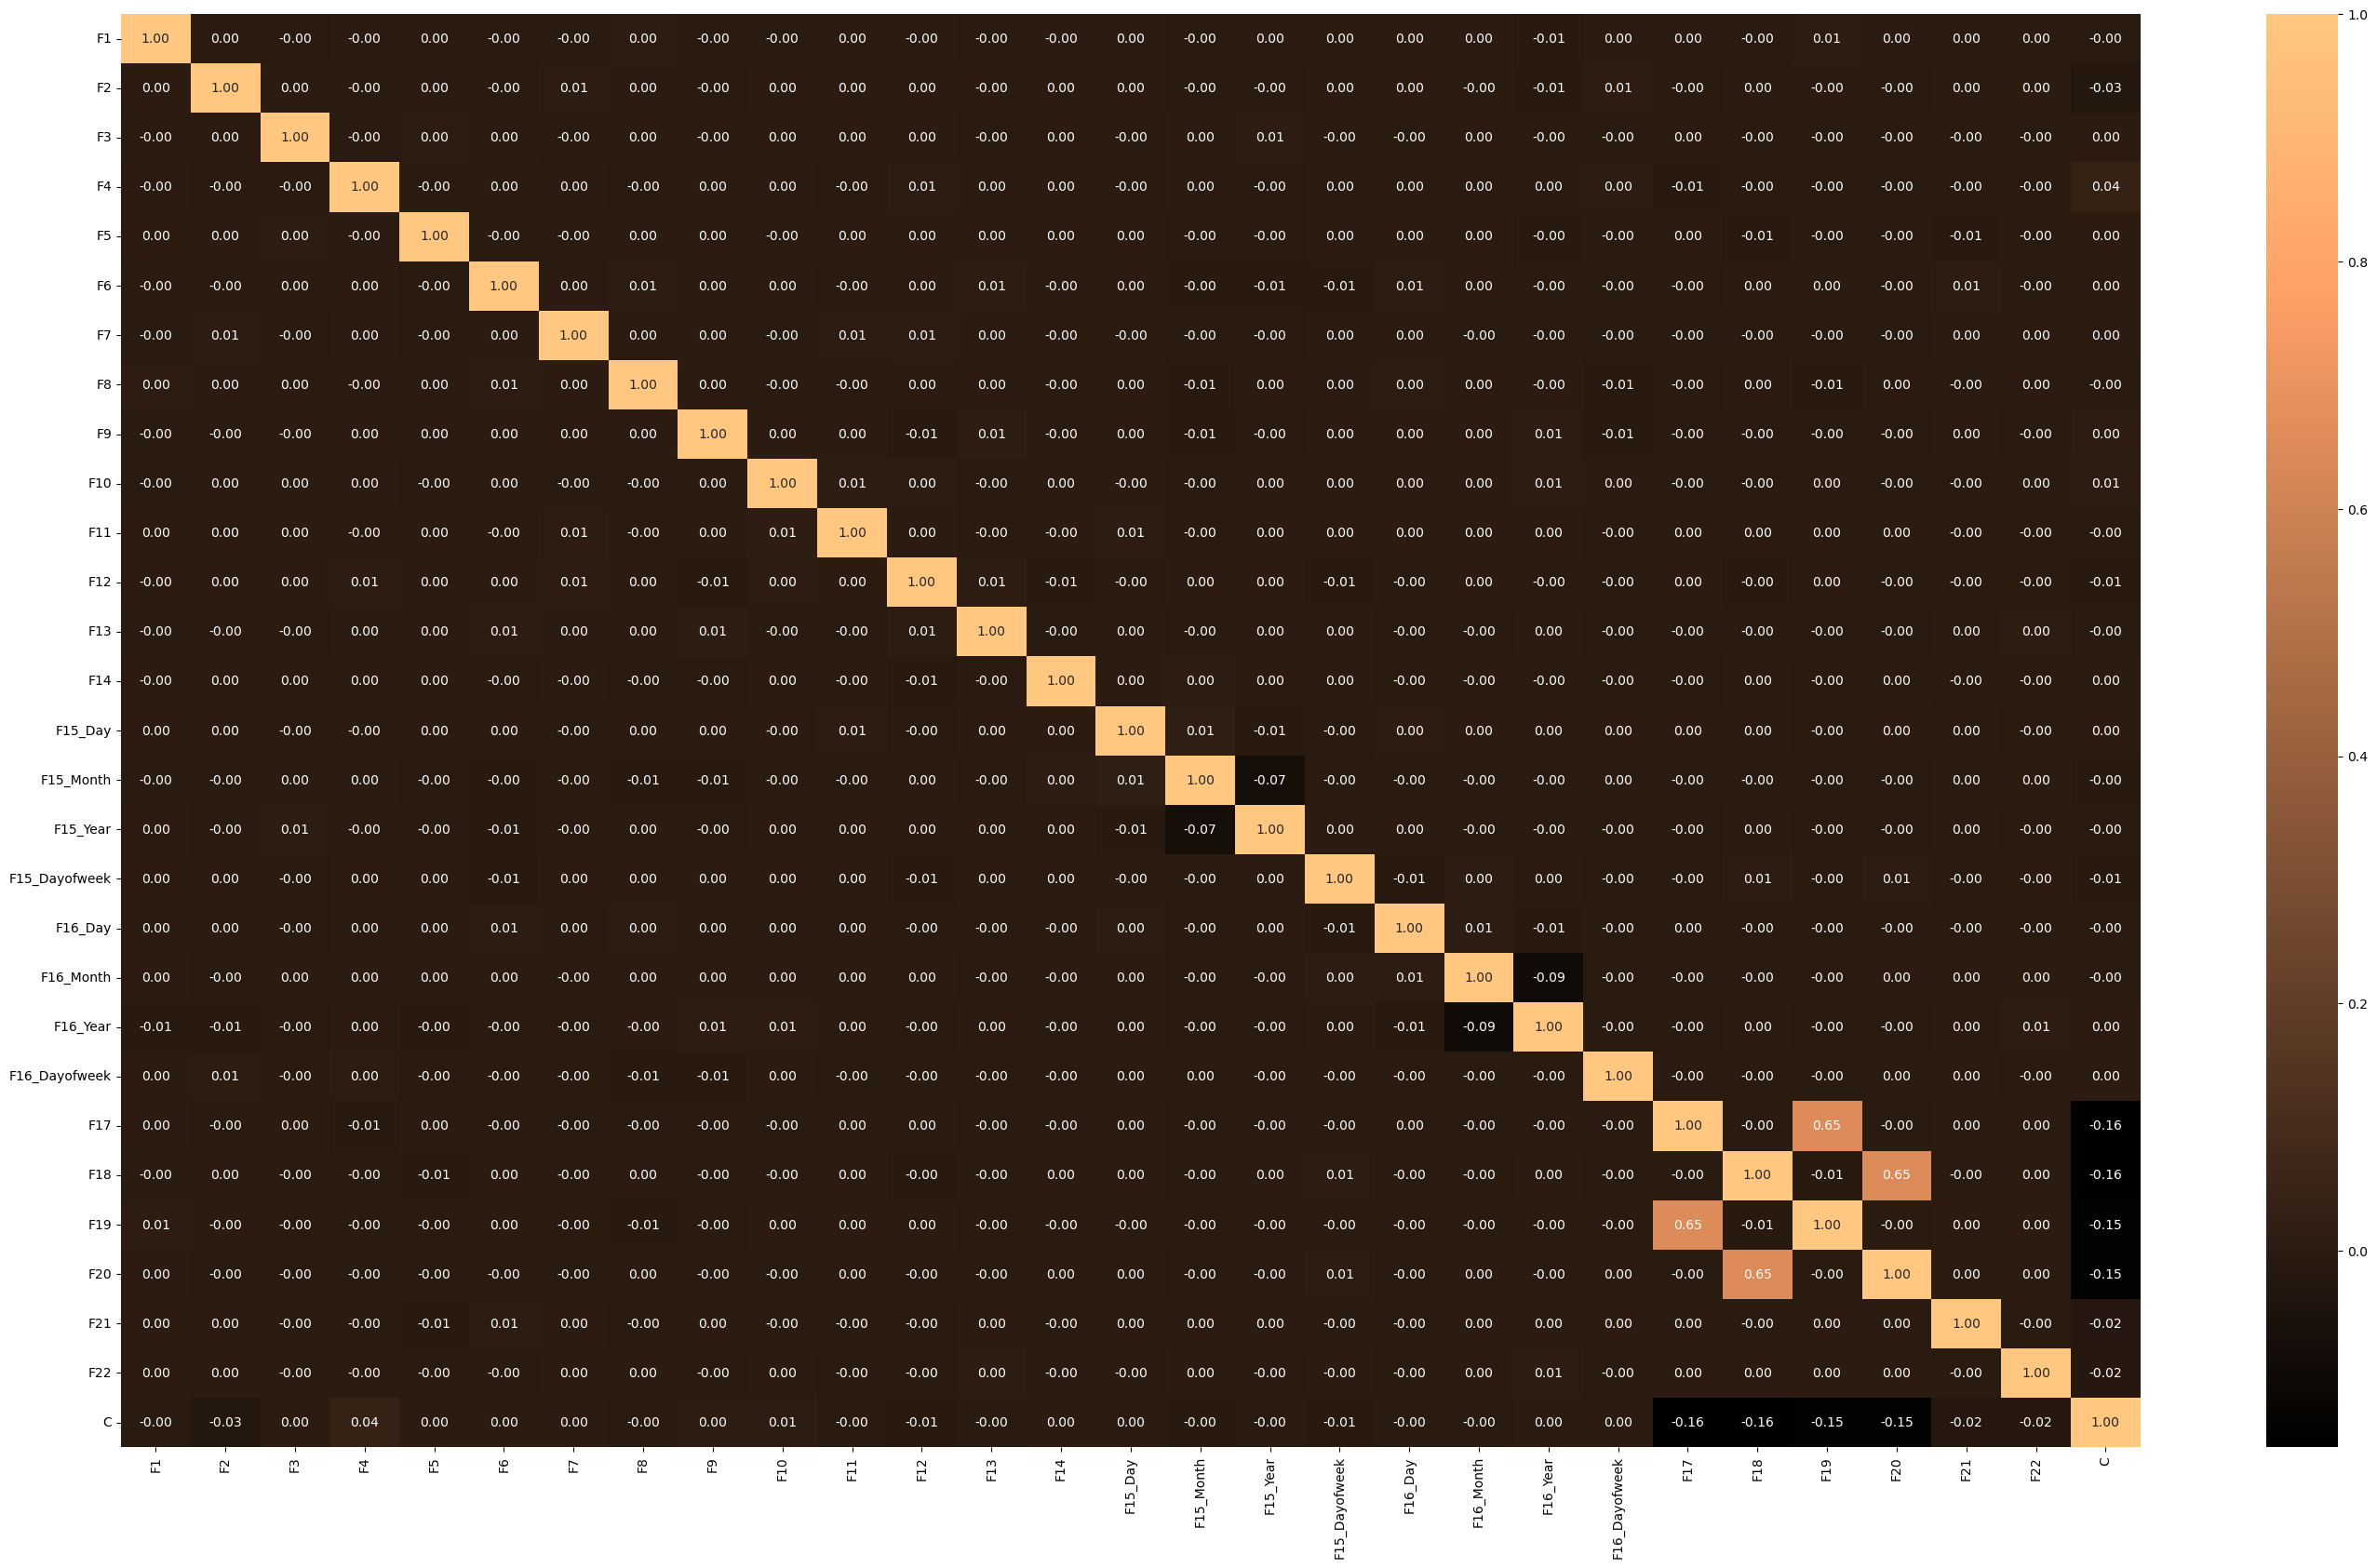

In [34]:
plt.figure(figsize=(35, 20))
sns.heatmap(corr_mat, annot=True, cmap="copper", fmt=".2f")
plt.show()

#No two features are highly co-related, hence, can't drop any feature manually

In [35]:
pca = PCA(n_components=10)  # Reducing to 10 features
x_train_pca = pca.fit_transform(x_train_sc)
x_test_pca = pca.transform(x_test_sc)
df_test_pca = pca.transform(df_test_sc)

### Comparing several classification model's performance to choose the best one

In [37]:
models = {
    "Logistic Regression": LogisticRegression(),
    "DecisionTreeClassifier": DecisionTreeClassifier(criterion="entropy", random_state=12),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=12),
    "GradientBoostingClassifier": GradientBoostingClassifier(n_estimators=100, random_state=12),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=12),
    "LightGBM": LGBMClassifier(random_state=12),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=12)
}

In [38]:
results = {}
for name, model in models.items():
    model.fit(x_train_pca, y_train)
    y_pred = model.predict(x_test_pca)
    acc = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    results[name] = (acc, roc_auc)
    print(f"{name} Accuracy: {acc:.4f}, ROC-AUC: {roc_auc:.4f}")
    print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.7555, ROC-AUC: 0.5004
              precision    recall  f1-score   support

           0       0.76      1.00      0.86     15287
           1       0.55      0.00      0.00      4949

    accuracy                           0.76     20236
   macro avg       0.65      0.50      0.43     20236
weighted avg       0.70      0.76      0.65     20236

DecisionTreeClassifier Accuracy: 0.6639, ROC-AUC: 0.5499
              precision    recall  f1-score   support

           0       0.78      0.77      0.78     15287
           1       0.32      0.33      0.32      4949

    accuracy                           0.66     20236
   macro avg       0.55      0.55      0.55     20236
weighted avg       0.67      0.66      0.67     20236

Random Forest Accuracy: 0.7525, ROC-AUC: 0.5061
              precision    recall  f1-score   support

           0       0.76      0.99      0.86     15287
           1       0.40      0.02      0.04      4949

    accuracy           

In [44]:
results

{'Logistic Regression': (0.7554852737695197, 0.5004426454209202),
 'DecisionTreeClassifier': (0.6638663767542993, 0.5499395330374662),
 'Random Forest': (0.7525202609211307, 0.5060640446599932),
 'GradientBoostingClassifier': (0.7552876062462938, 0.5001751693399449),
 'XGBoost': (0.745700731369836, 0.5087243187241067),
 'LightGBM': (0.7550405218422613, 0.5001482776574611),
 'CatBoost': (0.7525202609211307, 0.5027162185448769)}

### Choosing XGBoost Classifier

### Model training

In [46]:
xg = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=12)
xg.fit(x_train_pca, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=12, ...)

### Predictions

In [47]:
y_pred_egs = xg.predict(x_test_pca)
y_pred_egs

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
y_pred_actual = xg.predict(df_test_pca)
y_pred_actual

array([0, 0, 0, ..., 0, 0, 0])

### Saving the predictions

In [53]:
# Save predictions
pd.DataFrame({"Index": range(len(y_pred_egs)), "Class": y_pred_egs}).to_csv("train_predictions.txt", sep="\t", index=False)
pd.DataFrame({"Index": range(len(y_pred_actual)), "Class": y_pred_actual}).to_csv("test_predictions.txt", sep="\t", index=False)

# Save model
joblib.dump(xg, "xg.pkl")
joblib.dump(sc, "sc.pkl")

print("Training complete. Predictions saved!")

Training complete. Predictions saved!
